In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

from models.ffnn import FeedForwardNeuralNetwork


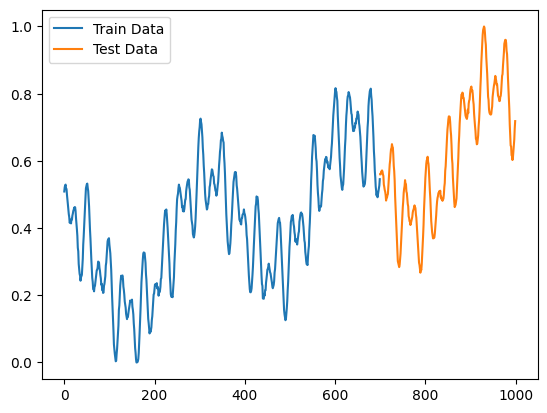

In [2]:
# Create a sine wave time series with some noise
time_steps = 1000
t = np.linspace(0, 50, time_steps)
y = np.sin(3*t) + t/10 + np.cos(5*t) + 2*np.cos(0.4*t) + np.random.normal(0, 0.05, time_steps)

def prescale(data):
    data = data.reshape(-1, 1)
    scaler = MinMaxScaler()
    scaler.fit(data, y=None)
    return scaler.transform(data).reshape(-1)
y = prescale(y)

split = 0.7
train_series = y[:int(len(y)*split)]
test_series = y[int(len(y)*split):]

plt.plot(range(len(train_series)), train_series, label='Train Data')
plt.plot(range(len(train_series), len(train_series) + len(test_series)), test_series, label='Test Data')
plt.legend()

In [3]:
ffnn = FeedForwardNeuralNetwork(train_series)
ffnn.learn_model(window_size=10, hidden_size=20)


Epoch 0/2000, Loss: 0.0366
Epoch 100/2000, Loss: 0.0022
Epoch 200/2000, Loss: 0.0025
Epoch 300/2000, Loss: 0.0026
Epoch 400/2000, Loss: 0.0025
Epoch 500/2000, Loss: 0.0027
Epoch 600/2000, Loss: 0.0029
Epoch 700/2000, Loss: 0.0026
Epoch 800/2000, Loss: 0.0031
Epoch 900/2000, Loss: 0.0026
Epoch 1000/2000, Loss: 0.0023
Epoch 1100/2000, Loss: 0.0026
Epoch 1200/2000, Loss: 0.0022
Epoch 1300/2000, Loss: 0.0022
Epoch 1400/2000, Loss: 0.0027
Epoch 1500/2000, Loss: 0.0027
Epoch 1600/2000, Loss: 0.0032
Epoch 1700/2000, Loss: 0.0029
Epoch 1800/2000, Loss: 0.0029
Epoch 1900/2000, Loss: 0.0025
Finished Training!


In [5]:
ffnn.predict_training_set()

TypeError: 'DataLoader' object is not subscriptable